Course Human-Centered Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/winter_term_2020_21/course_human_centered_data_science.html)) - Winter Term 2020/21 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)
***
# A2 - Reproducibility Workflow


Your assignment is to create a graph that looks a lot like the one below one, starting from scratch, and following best practices for reproducible research.

![wikipedia_pageViews_2008-2020.png](img/wikipedia_pageViews_2008-2020.png)

## Before you start
1. Read all instructions carefully before you begin.
1. Read all API documentation carefully before you begin.
1. Experiment with queries in the sandbox of the technical documentation for each API to familiarize yourself with the schema and the data.
1. Ask questions if you are unsure about anything!
1. When documenting your project, please keep the following questions in your mind:
   * _If I found this GitHub repository, and wanted to fully reproduce the analysis, what information would I want?_
   * _What information would I need?_

## Step 1️⃣: Data acquisition
In order to measure Wikipedia traffic from January 2008 until October 2020, you will need to collect data from two different APIs:

1. The **Legacy Pagecounts API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)) provides access to desktop and mobile traffic data from December 2007 through July 2016.
1. The **Pageviews API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end)) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

For each API, you need to collect data for all months where data is available and then save the raw results into five (3+2) separate `JSON`files (one file per API query type) before continuing to step 2.

To get you started, you can use the following **sample code for API calls**:

In [2]:
# Source: https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb?format=raw

import json
import requests

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

# SAMPLE parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020101000'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/AnilSahintuerk',
    'From': 'ilkas96@zedat-fu-berlin.de'
}

def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [3]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)
example_monthly_pageviews

{'items': [{'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015070100',
   'views': 4376666686},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015080100',
   'views': 4332482183},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015090100',
   'views': 4485491704},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015100100',
   'views': 4477532755},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015110100',
   'views': 4287720220},
  {'project': 'en.wikipedia',
   'access': 'desktop',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015120100',
   'views': 4100012037},
  {'project': 'en.wikipedia',
   'access': 

In [4]:
example_monthly_legacy = api_call(endpoint_legacy, example_params_legacy)
example_monthly_legacy

{'items': [{'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2007120100',
   'count': 2998331524},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008010100',
   'count': 4930902570},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008020100',
   'count': 4818393763},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008030100',
   'count': 4955405809},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008040100',
   'count': 5159162183},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timestamp': '2008050100',
   'count': 5584691092},
  {'project': 'en.wikipedia',
   'access-site': 'desktop-site',
   'granularity': 'monthly',
   'timest

### Get the queries

In [5]:
# Legacy Queries

example_params_legacy['access-site'] = 'mobile-site'
mobile_monthly_legacy = api_call(endpoint_legacy, example_params_legacy)

example_params_legacy['access-site'] = 'desktop-site'
desktop_monthly_legacy = api_call(endpoint_legacy, example_params_legacy)

# Pageview Queries

example_params_pageviews['access'] = 'desktop'
desktop_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

example_params_pageviews['access'] = 'mobile-app'
mobile_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

example_params_pageviews['access'] = 'mobile-web'
web_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

In [6]:
import os

# WARNING make sure to be in the right directory
# after this cell you should be in this path:
# <your-working-directory>/src
# rerunning this cell creates a src folder inside src 

# Create folder src
src_path = os.path.join(os.getcwd(), 'src')

if os.path.exists(src_path) == False:
    os.mkdir(src_path)

os.chdir(src_path)

print(os.getcwd())

/home/anil/.git/hcds-winter-2020/assignments/A2_ReproducibilityWorkflow/ansa/src


### Create and save the json files in src

In [7]:
# First we save all legacy files

# apiname_accesstype_YYYYMM-YYYYMM
with open('legacy_mobile-site_200101-201810', 'w') as file:
    json.dump(mobile_monthly_legacy, file)
    
with open('legacy_desktop-site_200101-201810', 'w') as file:
    json.dump(example_monthly_legacy, file)

with open('pageviews_desktop-site_200101-202010', 'w') as file:
    json.dump(example_monthly_pageviews, file)

with open('pageviews_mobile-site_200101-202010', 'w') as file:
    json.dump(mobile_monthly_pageviews, file)

with open('legacy_mobile-web_200101-202010', 'w') as file:
    json.dump(web_monthly_pageviews, file)
        

Your `JSON`-formatted source data file must contain the complete and un-edited output of your API queries. The naming convention for the source data files is: `apiname_accesstype_firstmonth-lastmonth.json`. For example, your filename for monthly page views on desktop should be: `pagecounts_desktop-site_200712-202010.json`

### Important notes❗
1. As much as possible, we're interested in *organic* (user) traffic, as opposed to traffic by web crawlers or spiders. The Pageview API (but not the Pagecount API) allows you to filter by `agent=user`. You should do that.
1. There is about one year of overlapping traffic data between the two APIs. You need to gather, and later graph, data from both APIs for this period of time.

## Step 2: Data processing

You will need to perform a series of processing steps on these data files in order to prepare them for analysis. These steps must be followed exactly in order to prepare the data for analysis. At the end of this step, you will have a single `CSV`-formatted data file `en-wikipedia_traffic_200712-202010.csv` that can be used in your analysis (step 3) with no significant additional processing.

* For data collected from the Pageviews API, combine the monthly values for `mobile-app` and `mobile-web` to create a total mobile traffic count for each month.
* For all data, separate the value of `timestamp` into four-digit year (`YYYY`) and two-digit month (`MM`) and discard values for day and hour (`DDHH`).

Combine all data into a single CSV file with the following headers:

| year | month |pagecount_all_views|pagecount_desktop_views|pagecount_mobile_views|pageview_all_views|pageview_desktop_views|pageview_mobile_views|
|------| ------|-------------------|-----------------------|----------------------|------------------|----------------------|---------------------|
| YYYY | MM    |num_views          |num_views              |num_views             |num_views         |num_views             |num_views            | 

### Combine mobile-app and moble-web monthly trafic

In [8]:
import pandas as pd

# Create 2 data frames for each pageviews_mobile query
# Merge them at their date

# Get the data we need
# [[views, timestamp], ...]
app_data = [[x['views'], x['timestamp']] for x in mobile_monthly_pageviews['items']]
web_data = [[x['views'], x['timestamp']] for x in web_monthly_pageviews['items']]

df_app = pd.DataFrame(app_data, columns=['Views', 'Timestamp'])
df_web = pd.DataFrame(web_data, columns=['Views', 'Timestamp'])

df_pageviews_mobile = pd.merge(df_app, df_web, on='Timestamp')
df_pageviews_mobile['pageviews_mobile_views'] = [row['Views_x']+row['Views_y'] for index, row in df_pageviews_mobile.iterrows()]
del df_pageviews_mobile['Views_x']
del df_pageviews_mobile['Views_y']
df_pageviews_mobile.head()

,Timestamp,pageviews_mobile_views
0,2015070100,3288755294
1,2015080100,3302333038
2,2015090100,3170203333
3,2015100100,3268499132
4,2015110100,3236601070


### Create final Dataframe

In [9]:
# Get the count/view and Timestamp for each query to create a DataFrame

legacy_desktop_data = [[x['count'], x['timestamp']] for x in desktop_monthly_legacy['items']]
legacy_mobile_data = [[x['count'], x['timestamp']] for x in mobile_monthly_legacy['items']]
pageviews_desktop_data = [[x['views'], x['timestamp']] for x in desktop_monthly_pageviews['items']]

# Create DataFrame for each unprocessed data variable 

df_legacy_desktop = pd.DataFrame(legacy_desktop_data, columns=['pagecount_desktop_views', 'Timestamp'])
df_legacy_mobile = pd.DataFrame(legacy_mobile_data, columns=['pagecount_mobile_views', 'Timestamp'])
df_pageviews_desktop = pd.DataFrame(pageviews_desktop_data, columns=['pageviews_desktop_views', 'Timestamp'])


In [10]:
# Create Legacy Dataframe

df_legacy = pd.merge(df_legacy_desktop, df_legacy_mobile, how='outer', on='Timestamp')
df_legacy.tail()

,pagecount_desktop_views,Timestamp,pagecount_mobile_views
100,5572235399,2016040100,3.301385e+09
101,5330532334,2016050100,3.418436e+09
102,4975092447,2016060100,3.372618e+09
103,5363966439,2016070100,3.500661e+09
104,913675893,2016080100,4.800413e+08


In [11]:
# Create Pageviews DataFrame

df_pageviews = pd.merge(df_pageviews_desktop, df_pageviews_mobile, on='Timestamp')
df_pageviews.head()

,pageviews_desktop_views,Timestamp,pageviews_mobile_views
0,4376666686,2015070100,3288755294
1,4332482183,2015080100,3302333038
2,4485491704,2015090100,3170203333
3,4477532755,2015100100,3268499132
4,4287720220,2015110100,3236601070


In [12]:
# Create Traffic DataFrame

df_traffic = pd.merge(df_legacy, df_pageviews, how='outer', on='Timestamp')
df_traffic.head()

,pagecount_desktop_views,Timestamp,pagecount_mobile_views,pageviews_desktop_views,pageviews_mobile_views
0,2.998332e+09,2007120100,NaN,NaN,NaN
1,4.930903e+09,2008010100,NaN,NaN,NaN
2,4.818394e+09,2008020100,NaN,NaN,NaN
3,4.955406e+09,2008030100,NaN,NaN,NaN
4,5.159162e+09,2008040100,NaN,NaN,NaN


### Replace Timestap for columns year and month

In [13]:
df_traffic['year'] = [year[1][0:4] for year in df_traffic['Timestamp'].items()]
df_traffic['month'] = [year[1][4:6] for year in df_traffic['Timestamp'].items()]
del df_traffic['Timestamp']
df_traffic.head()

,pagecount_desktop_views,pagecount_mobile_views,pageviews_desktop_views,pageviews_mobile_views,year,month
0,2.998332e+09,NaN,NaN,NaN,2007,12
1,4.930903e+09,NaN,NaN,NaN,2008,01
2,4.818394e+09,NaN,NaN,NaN,2008,02
3,4.955406e+09,NaN,NaN,NaN,2008,03
4,5.159162e+09,NaN,NaN,NaN,2008,04


### Create 'all' columns for pagecount and pageviews

In [14]:
df_traffic['pagecount_all_views'] = df_traffic['pagecount_desktop_views'] + df_traffic['pagecount_mobile_views']
df_traffic['pageviews_all_views'] = df_traffic['pageviews_desktop_views'] + df_traffic['pageviews_mobile_views']
df_traffic.head()

,pagecount_desktop_views,pagecount_mobile_views,pageviews_desktop_views,pageviews_mobile_views,year,month,pagecount_all_views,pageviews_all_views
0,2.998332e+09,NaN,NaN,NaN,2007,12,NaN,NaN
1,4.930903e+09,NaN,NaN,NaN,2008,01,NaN,NaN
2,4.818394e+09,NaN,NaN,NaN,2008,02,NaN,NaN
3,4.955406e+09,NaN,NaN,NaN,2008,03,NaN,NaN
4,5.159162e+09,NaN,NaN,NaN,2008,04,NaN,NaN


### Rearrange columns

In [15]:
columnsTitles = ['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views',
                'pageviews_all_views', 'pageviews_desktop_views', 'pageviews_mobile_views']
df_traffic = df_traffic.reindex(columns=columnsTitles)
df_traffic.head()

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageviews_all_views,pageviews_desktop_views,pageviews_mobile_views
0,2007,12,NaN,2.998332e+09,NaN,NaN,NaN,NaN
1,2008,01,NaN,4.930903e+09,NaN,NaN,NaN,NaN
2,2008,02,NaN,4.818394e+09,NaN,NaN,NaN,NaN
3,2008,03,NaN,4.955406e+09,NaN,NaN,NaN,NaN
4,2008,04,NaN,5.159162e+09,NaN,NaN,NaN,NaN


### Save raw data as csv

In [16]:
# Exit src folder

os.chdir('..')
os.getcwd()

'/home/anil/.git/hcds-winter-2020/assignments/A2_ReproducibilityWorkflow/ansa'

In [17]:
# Create folder 'data_raw'

path = os.path.join(os.getcwd(), 'data_raw')

if not os.path.exists(path):
    os.mkdir(path)
    
path = os.path.join(path, 'raw_wikipedia_traffic_data')

In [18]:
print(path)

df_traffic.to_csv(path, index=False)

/home/anil/.git/hcds-winter-2020/assignments/A2_ReproducibilityWorkflow/ansa/data_raw/raw_wikipedia_traffic_data


### Test if it works

In [19]:
df_tmp = pd.read_csv(path)
df_tmp.head()

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageviews_all_views,pageviews_desktop_views,pageviews_mobile_views
0,2007,12,NaN,2.998332e+09,NaN,NaN,NaN,NaN
1,2008,1,NaN,4.930903e+09,NaN,NaN,NaN,NaN
2,2008,2,NaN,4.818394e+09,NaN,NaN,NaN,NaN
3,2008,3,NaN,4.955406e+09,NaN,NaN,NaN,NaN
4,2008,4,NaN,5.159162e+09,NaN,NaN,NaN,NaN


### Clean Data

### Replace NaN with 0

In [20]:
df_traffic = df_traffic.fillna(0)

### Replace 0 in _all_views with the sum of desktop_views and mobile_views

In [21]:
df_traffic['pagecount_all_views'] = df_traffic['pagecount_desktop_views'] + df_traffic['pagecount_mobile_views']
df_traffic['pageviews_all_views'] = df_traffic['pageviews_desktop_views'] + df_traffic['pageviews_mobile_views']
df_traffic.head()

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageviews_all_views,pageviews_desktop_views,pageviews_mobile_views
0,2007,12,2.998332e+09,2.998332e+09,0.0,0.0,0.0,0.0
1,2008,01,4.930903e+09,4.930903e+09,0.0,0.0,0.0,0.0
2,2008,02,4.818394e+09,4.818394e+09,0.0,0.0,0.0,0.0
3,2008,03,4.955406e+09,4.955406e+09,0.0,0.0,0.0,0.0
4,2008,04,5.159162e+09,5.159162e+09,0.0,0.0,0.0,0.0


### Replace alls 0 values back to NaN again

In [30]:
# For this project we do not need to plot the zero values
# In case zero values are needed in data set delete this cell

import numpy as np
df_traffic.replace(0, np.nan, inplace=True)
df_traffic.head()

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageviews_all_views,pageviews_desktop_views,pageviews_mobile_views
0,2007,12,2.998332e+09,2.998332e+09,NaN,NaN,NaN,NaN
1,2008,01,4.930903e+09,4.930903e+09,NaN,NaN,NaN,NaN
2,2008,02,4.818394e+09,4.818394e+09,NaN,NaN,NaN,NaN
3,2008,03,4.955406e+09,4.955406e+09,NaN,NaN,NaN,NaN
4,2008,04,5.159162e+09,5.159162e+09,NaN,NaN,NaN,NaN


### save clean data

In [29]:
os.getcwd()

'/home/anil/.git/hcds-winter-2020/assignments/A2_ReproducibilityWorkflow/ansa'

In [31]:
# Create folder 'data_clean'

path = os.path.join(os.getcwd(), 'data_clean')

if not os.path.exists(path):
    os.mkdir(path)

path = os.path.join(path, 'all_views_filled')

print(path)

df_traffic.to_csv(path, index=False)

os.listdir(os.getcwd())

/home/anil/.git/hcds-winter-2020/assignments/A2_ReproducibilityWorkflow/ansa/data_clean/all_views_filled


['data_raw',
 'results.png',
 'src',
 '.ipynb_checkpoints',
 'A2_ReproducibilityWorkflow.ipynb',
 'README.txt',
 'results',
 'data_clean']

## Step 3: Analysis

For this assignment, the "analysis" will be fairly straightforward: you will visualize the dataset you have created as a **time series graph**. Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled; and the graph should possess a legend and a title. You must also generate a .png or .jpeg formatted image of your final graph.
Please graph the data in your notebook, rather than using an external application!

***

#### Credits

This exercise is slighty adapted from the course [Human Centered Data Science (Fall 2019)](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)) of [Univeristy of Washington](https://www.washington.edu/datasciencemasters/) by [Jonathan T. Morgan](https://wiki.communitydata.science/User:Jtmorgan).

Same as the original inventors, we release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).

In [23]:
import matplotlib.pyplot as plt

In [24]:
os.getcwd()

'/home/anil/.git/hcds-winter-2020/assignments/A2_ReproducibilityWorkflow/ansa'

In [25]:
# Create folder 'results'

path = os.path.join(os.getcwd(), 'results')

if not os.path.exists(path):
    os.mkdir(path)

path = os.path.join(path, 'pageviews_en_wikipedia.png')

os.listdir(os.getcwd())

['data_raw',
 'results.png',
 'src',
 '.ipynb_checkpoints',
 'A2_ReproducibilityWorkflow.ipynb',
 'README.txt',
 'results']

In [26]:
years = df_traffic['year'].tolist()

index_years = []

for i in range(0, len(years)):
    if i == len(years)-1:
        break
    if years[i] != years[i+1]:
        index_years.append(i)
        
# We have to shift index years from december to january (-11) 

index_years = [x - 11 for x in index_years]

# We have to correct index 0 for 2007
# because we only have the december

index_years[0] = 0

# Remove duplicates from years

years = list(dict.fromkeys(years))

index_years

[0, 1, 13, 25, 37, 49, 61, 73, 85, 97, 109, 121, 133]

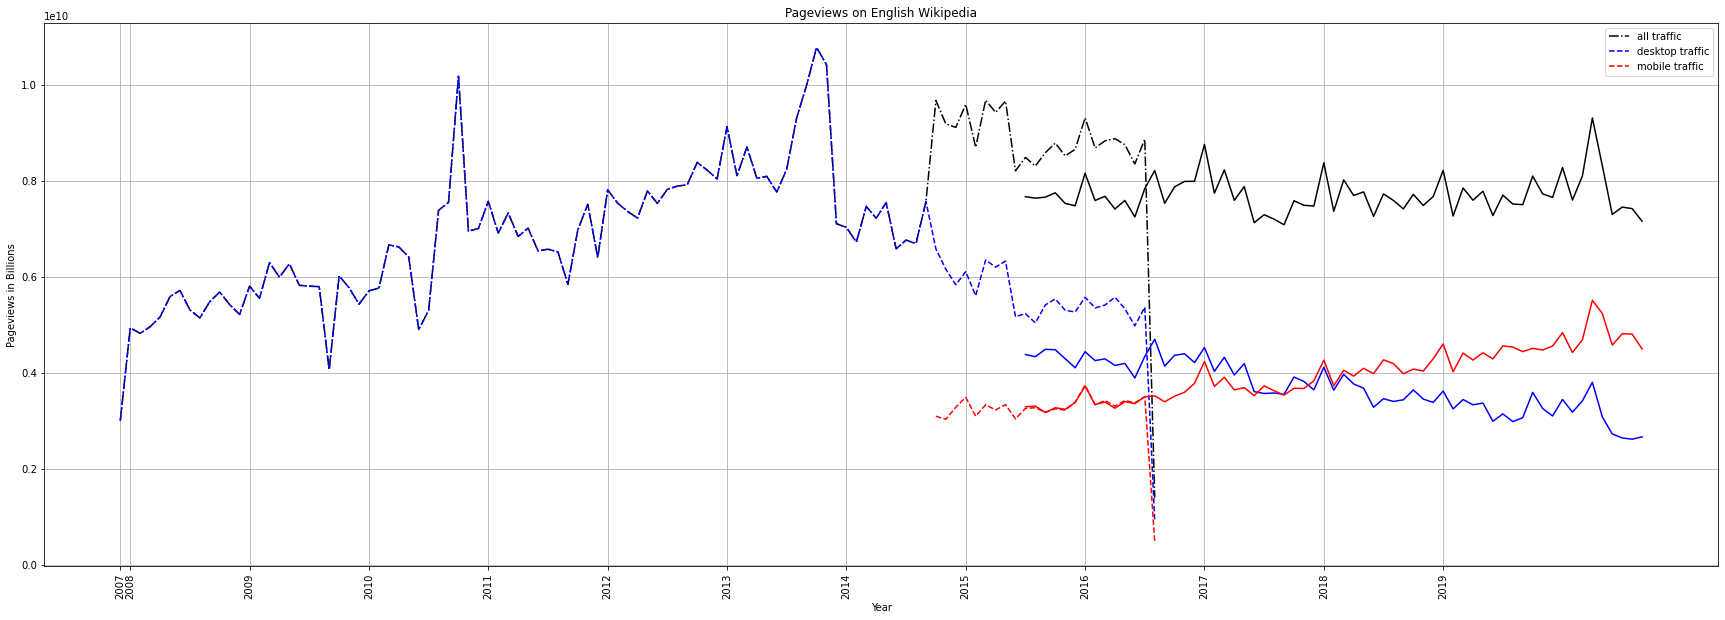

In [27]:
df_traffic.plot(y=['pagecount_all_views','pagecount_desktop_views', 'pagecount_mobile_views',
                             'pageviews_all_views', 'pageviews_desktop_views', 'pageviews_mobile_views'],
                figsize=(30, 10), grid=True, style=['-.','--','--','-','-','-'],
               color=['k', 'b', 'r'])

plt.title('Pageviews on English Wikipedia')
plt.ylabel('Pageviews in Billions')
plt.xticks(ticks=index_years, labels=years, rotation='vertical')
plt.xlabel('Year')
plt.legend(['all traffic', 'desktop traffic', 'mobile traffic'])# save graph
plt.savefig(path)
plt.show()

In [28]:
# check if file exists

path = os.path.join(os.getcwd(), 'results')
os.listdir(path)

['.ipynb_checkpoints', 'pageviews_en_wikipedia.png']